## NAME - AKHILESH JOSHI
## ROLL NO - 03 , B DIVISION 
## V SEM - 02FE22BCS013

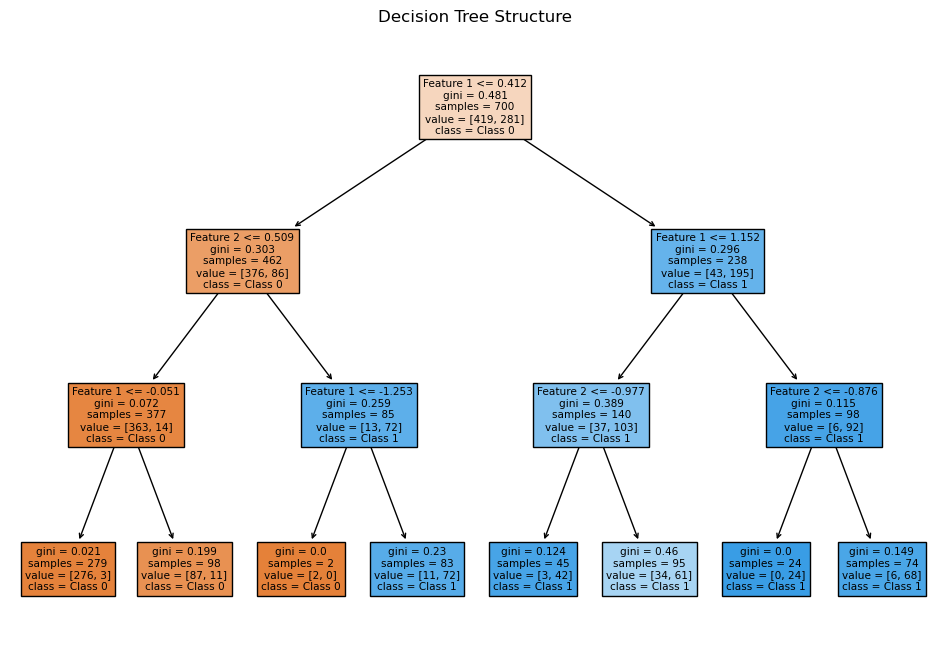

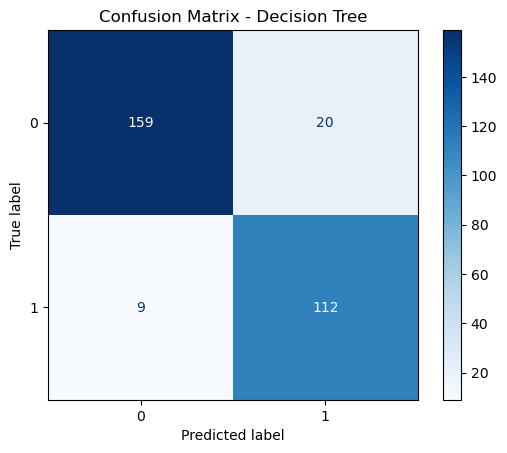

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv(r"C:\anaconda3\car_data.csv")
data_cleaned = data.dropna()

X = data_cleaned[['Age', 'AnnualSalary']].values
y = data_cleaned['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class DecisionTreeModel:
    def __init__(self, criterion='gini', max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.model = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def plot_decision_tree(self):
        plt.figure(figsize=(12, 8))
        plot_tree(self.model, filled=True, feature_names=[f'Feature {i+1}' for i in range(X_train.shape[1])], class_names=['Class 0', 'Class 1'])
        plt.title("Decision Tree Structure")
        plt.show()

    def plot_confusion_matrix(self, y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title("Confusion Matrix - Decision Tree")
        plt.show()

decision_tree = DecisionTreeModel(criterion='gini', max_depth=3)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
decision_tree.plot_decision_tree()
decision_tree.plot_confusion_matrix(y_test, y_pred_tree)


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred_tree)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred_tree)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred_tree)
print(f"F1 Score: {f1:.4f}")


try:
    y_prob = decision_tree.model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC: {auc_roc:.4f}")
except:
    print("AUC-ROC is not applicable for non-binary or certain multi-class scenarios.")


Accuracy: 0.9033
Precision: 0.8485
Recall: 0.9256
F1 Score: 0.8854
AUC-ROC: 0.9369


In [8]:

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_tree)


print("Confusion Matrix:")
print(cm)


print(f"\nTrue Negatives (TN): {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")
print(f"True Positives (TP): {cm[1, 1]}")


Confusion Matrix:
[[159  20]
 [  9 112]]

True Negatives (TN): 159
False Positives (FP): 20
False Negatives (FN): 9
True Positives (TP): 112
